Лабораторна робота №7 ФІТ 4-6 Піць А. В.

100%|██████████| 9.91M/9.91M [00:00<00:00, 102MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 41.7MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 80.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.59MB/s]


Epoch 1/10, Loss: 0.0570
Epoch 2/10, Loss: 0.0333
Epoch 3/10, Loss: 0.0277
Epoch 4/10, Loss: 0.0248
Epoch 5/10, Loss: 0.0231
Epoch 6/10, Loss: 0.0217
Epoch 7/10, Loss: 0.0208
Epoch 8/10, Loss: 0.0200
Epoch 9/10, Loss: 0.0194
Epoch 10/10, Loss: 0.0189


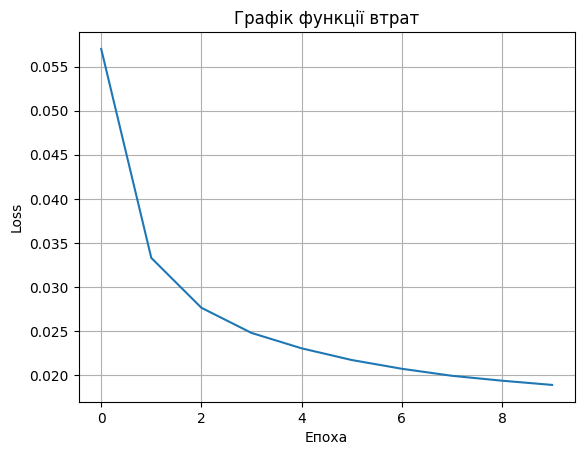

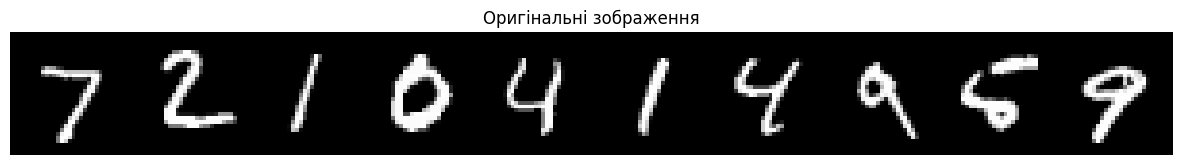

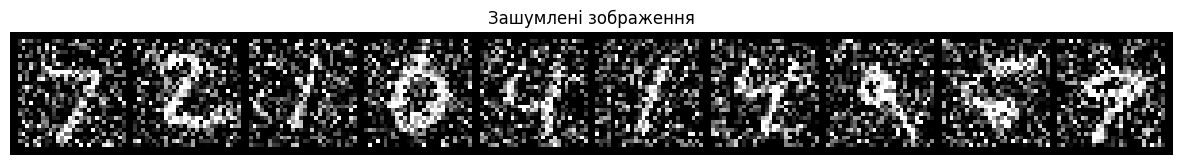

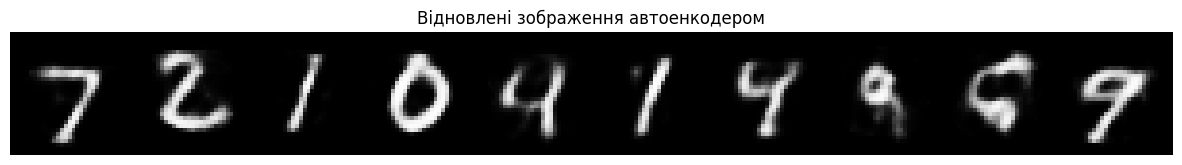

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Перевірка GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Завантаження датасету MNIST
transform = transforms.ToTensor()

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

# Додавання шуму
def add_noise(imgs, noise_factor=0.5):
    noisy = imgs + noise_factor * torch.randn_like(imgs)
    return torch.clamp(noisy, 0., 1.)

# Автокодувальник
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Кодувальник
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
        )
        # Декодувальник
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Навчання
n_epochs = 10
losses = []

for epoch in range(n_epochs):
    total_loss = 0
    for imgs, _ in train_loader:
        noisy_imgs = add_noise(imgs).to(device)
        imgs = imgs.to(device)

        outputs = model(noisy_imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")

# Графік функції втрат
plt.plot(losses)
plt.title('Графік функції втрат')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Візуалізація результатів
dataiter = iter(test_loader)
images, _ = next(dataiter)
noisy_imgs = add_noise(images).to(device)
outputs = model(noisy_imgs)

# Вивід
def imshow(imgs, title):
    imgs = torchvision.utils.make_grid(imgs.cpu(), nrow=10)
    plt.figure(figsize=(15, 2))
    plt.title(title)
    plt.imshow(imgs.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

imshow(images, "Оригінальні зображення")
imshow(noisy_imgs, "Зашумлені зображення")
imshow(outputs, "Відновлені зображення автоенкодером")


Висновок:
Автокодувальник успішно навчився відновлювати рукописні цифри MNIST із зашумлених зображень. Графік функції втрат показав поступове зменшення помилки під час навчання, що свідчить про ефективність моделі. Візуалізація результатів підтверджує здатність мережі усувати шум і відтворювати основні риси цифр.